<a href="https://colab.research.google.com/github/curiousbasil/nyctaxitripduration/blob/master/NYC_Taxi_Trip_Duration_Predictor_CS_6341J1_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NYC Taxi Trip Duration Predictor - CS 6341J1 FinalProject**


Final Project for CS 6341J1 .
*Due on 15th of Dec 2019*

---
Case Study and Program Prepared by:

*   **Faisal Sukkar**
*   **Steven Wong**


---

##**Notebook objective:**


We will first study and visualize the original data, engineer new features, and examine potential outliers. 

---


##**Competition objective:**

The competition objective is to predict journey time of taxi trips in New York city, based on features like pickup time stamp and ride start and destination co-ordinates(longitude and latitude).


# **First Step is to Mount Google Drive**


In [1]:
#First we Mount our project to Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# To support python 2 & 3
from __future__ import division, print_function, unicode_literals
#Basic Imports
import os
import pandas as pd
import numpy as np
from google.colab import files 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import lightgbm as lgb
!pip install -q kaggle

#for stable output across runs
np.random.seed(42)

#to plot
!pip install matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

!pip install folium
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
pd.options.mode.chained_assignment = None 

from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt

# **Here we Import the Data From the Kaggle Library**

In [3]:
# Install Kaggle library
!pip install kaggle

In [5]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Move kaggle.json to /root/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json  ~/.kaggle/kaggle.json

In [0]:
!chmod 600  ~/.kaggle/kaggle.json

In [8]:
# Download dataset
!kaggle competitions download -c nyc-taxi-trip-duration

 86% 54.0M/62.9M [00:00<00:00, 50.6MB/s]
100% 62.9M/62.9M [00:00<00:00, 80.8MB/s]
  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49M [00:00<00:00, 166MB/s]
 44% 9.00M/20.3M [00:00<00:01, 11.8MB/s]
100% 20.3M/20.3M [00:01<00:00, 20.0MB/s]


# **Let's Set the Data We Just Imported**


In [0]:
#Now lets define both the train and test datasets
train_df = pd.read_csv('train.zip', compression='zip', header=0, sep=',', quotechar='"')
test_df = pd.read_csv('test.zip', compression='zip', header=0, sep=',', quotechar='"')

# **Let's Take a Quick look at the features of this data set and some general information of the Data it holds**

In [10]:
#view the first few lines of the training data set
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
#view the first few lines of the test data set
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [12]:
#general info about training data set 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [13]:
#general info about test data set 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [14]:
#Lets see how many rows and how many columns the training data set has
train_df.shape

(1458644, 11)

In [15]:
#Lets see how many rows and how many columns the test data set has
test_df.shape

(625134, 9)

####From this we can see above that there are 1,458,643 rows in the training dataset and 625,133 rows in the test dataset. We also notice that the test data set is missing 2 columns which are in the train dataset. They are:
* dropoff_datetime
* trip_duration

In [0]:
#lets create random subsets of the main train and test dataframe to save some memory when plotting
train_sub = train_df.sample(frac = 0.1)
test_sub = test_df.sample(frac = 0.1)

In [17]:
#let us check the shape of the new training data frame
train_sub.shape

(145864, 11)

In [18]:
#let us check the shape of the new test data frame
test_sub.shape

(62513, 9)

In [21]:
#lets change the format of the data below to floats so they dont show as 
#unreadable data
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [22]:
#Let us see the longest trip duration
train_df.max()

id                              id4000000
vendor_id                               2
pickup_datetime       2016-06-30 23:59:39
dropoff_datetime      2016-07-01 23:02:03
passenger_count                         9
pickup_longitude                  -61.336
pickup_latitude                    51.881
dropoff_longitude                 -61.336
dropoff_latitude                   43.921
store_and_fwd_flag                      Y
trip_duration                     3526282
dtype: object

###By checking the data, we see that the longest trip was 3526282 seconds which is about 980 hours. This obviously doesn't make sense. Also when we look at the mean for trip durations we see that the average trip is about 944 seconds which is about 15 minutes. This  proves that there are outliers. 
###Also we we can see that the max Pickup latitude is 51.8811 and the max longitude is -61.3355. By searching online maps we can find that city borders are as follows, city_long_border = (-74.03, -73.75) city_lat_border = (40.63, 40.85). Which also mean there are rides beyond the limits of the city .
###Because of these observations, we need to clean the data from the outliers.


---
#Cleaning the data set
---


####**Geographical Cleaning:**
The borders of NY City coordinates are:

city_long_border = (-74.03, -73.75) city_lat_border = (40.63, 40.85)

Comparing to our train_df.describe() output we see that there are some coordinate points (pick ups/drop offs) that fall outside these borders. So let's limit our area of investigation to within the NY City borders.

In [0]:
#Latitude and Longitude Clean-up
train_df = train_df[train_df['pickup_longitude'] <= -73.75]
train_df = train_df[train_df['pickup_longitude'] >= -74.03]
train_df = train_df[train_df['pickup_latitude'] <= 40.85]
train_df = train_df[train_df['pickup_latitude'] >= 40.63]
train_df = train_df[train_df['dropoff_longitude'] <= -73.75]
train_df = train_df[train_df['dropoff_longitude'] >= -74.03]
train_df = train_df[train_df['dropoff_latitude'] <= 40.85]
train_df = train_df[train_df['dropoff_latitude'] >= 40.63]

####Trip Length Clean-up

In [0]:
#Trip Duration Cleanup. Let's Settle for less than 20000 seconds and more than 60 Seconds
train_df = train_df[train_df['trip_duration'] <= 20000]
train_df = train_df[train_df['trip_duration'] >= 60]

In [27]:
# five largest values in column age 
train_df.nlargest(10, ['trip_duration']) 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1263976,id2750755,2,2016-06-11 18:46:46,2016-06-12 00:00:00,2,-73.996,40.716,-73.963,40.779,N,18794
435302,id3681830,2,2016-05-03 18:47:57,2016-05-04 00:00:00,1,-73.873,40.774,-73.889,40.751,N,18723
824127,id2975525,2,2016-04-22 18:48:01,2016-04-23 00:00:00,1,-73.975,40.754,-73.986,40.758,N,18719
173931,id2959094,2,2016-03-04 18:52:41,2016-03-05 00:00:00,1,-73.982,40.779,-73.957,40.802,N,18439
920993,id0717556,2,2016-06-23 11:02:40,2016-06-23 15:27:40,1,-73.779,40.648,-73.795,40.657,N,15900
572056,id1738549,2,2016-06-22 13:02:35,2016-06-22 17:22:52,1,-73.983,40.767,-73.984,40.778,N,15617
837429,id0327717,2,2016-05-23 10:20:06,2016-05-23 14:38:06,1,-73.986,40.760,-73.984,40.753,N,15480
633835,id0868099,2,2016-03-22 19:43:02,2016-03-23 00:00:00,1,-73.871,40.774,-73.994,40.745,N,15418
34493,id0117857,1,2016-01-17 17:54:07,2016-01-17 21:51:30,1,-73.982,40.756,-73.992,40.764,N,14243
998597,id3267254,1,2016-04-17 11:43:23,2016-04-17 15:39:23,1,-73.790,40.647,-73.793,40.657,N,14160


##Since trip Duration is showing very sparse results, we will take rides which only lies within 2 Standard Deviations from the mean.

In [0]:
#Lets clean data using the mean and the Standard Deviation
mean = np.mean(train_df['trip_duration'])
std = np.std(train_df['trip_duration'])

In [0]:
train_dfc = train_df[train_df['trip_duration'] <= mean + 2*std]
train_dfc = train_df[train_df['trip_duration'] >= mean - 2*std]

In [30]:
#lets decribe the new data frame . We expect STD to be close to 2 
train_dfc.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1429114.000,1429114.000,1429114.000,1429114.000,1429114.000,1429114.000,1429114.000
mean,1.535,1.665,-73.974,40.751,-73.974,40.752,829.221
std,0.499,1.315,0.037,0.027,0.032,0.030,646.851
min,1.000,0.000,-74.030,40.630,-74.030,40.630,60.000
25%,1.000,1.000,-73.992,40.738,-73.991,40.736,398.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,658.000
75%,2.000,2.000,-73.968,40.768,-73.964,40.770,1060.000
max,2.000,6.000,-73.753,40.850,-73.750,40.850,18794.000


In [31]:
#lets see what remains after cleaning outliers in terms of trip duration. We expect it to drop
#from the original 1.458 Million
train_dfc.shape

(1429114, 11)

In [32]:
train_dfc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [33]:
train_dfc.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [34]:
#Here's lets see what the data looks like . We expect top 10 durarion to have dropped significantly
train_dfc.nlargest(10, ['trip_duration']) 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1263976,id2750755,2,2016-06-11 18:46:46,2016-06-12 00:00:00,2,-73.996,40.716,-73.963,40.779,N,18794
435302,id3681830,2,2016-05-03 18:47:57,2016-05-04 00:00:00,1,-73.873,40.774,-73.889,40.751,N,18723
824127,id2975525,2,2016-04-22 18:48:01,2016-04-23 00:00:00,1,-73.975,40.754,-73.986,40.758,N,18719
173931,id2959094,2,2016-03-04 18:52:41,2016-03-05 00:00:00,1,-73.982,40.779,-73.957,40.802,N,18439
920993,id0717556,2,2016-06-23 11:02:40,2016-06-23 15:27:40,1,-73.779,40.648,-73.795,40.657,N,15900
572056,id1738549,2,2016-06-22 13:02:35,2016-06-22 17:22:52,1,-73.983,40.767,-73.984,40.778,N,15617
837429,id0327717,2,2016-05-23 10:20:06,2016-05-23 14:38:06,1,-73.986,40.760,-73.984,40.753,N,15480
633835,id0868099,2,2016-03-22 19:43:02,2016-03-23 00:00:00,1,-73.871,40.774,-73.994,40.745,N,15418
34493,id0117857,1,2016-01-17 17:54:07,2016-01-17 21:51:30,1,-73.982,40.756,-73.992,40.764,N,14243
998597,id3267254,1,2016-04-17 11:43:23,2016-04-17 15:39:23,1,-73.790,40.647,-73.793,40.657,N,14160


##Now with train_dfc we the longest trip is only 5 hours . But since the ride is still within the city limits based on the Long and Lat this is still considered an outlier but at this point its just speculation that maybe the driver forgot to reset his meter. Overall the Data is much cleaner, and we are ready to visualize it. 

#We will use 

In [0]:
#Lets Map some of the data 
west, south, east, north = -74.03, 40.63, -73.75, 40.85
train_dfc = train_df[(train_dfc.pickup_latitude> south) & (train_df.pickup_latitude < north)]
train_dfc = train_df[(train_dfc.dropoff_latitude> south) & (train_df.dropoff_latitude < north)]
train_dfc = train_df[(train_dfc.pickup_longitude> west) & (train_df.pickup_longitude < east)]
train_dfc = train_df[(train_dfc.dropoff_longitude> west) & (train_df.dropoff_longitude < east)]

In [0]:
train_dfc['dropoff_datetime'] = pd.to_datetime(train_dfc.dropoff_datetime)
train_dfc['dropoff_month'] = train_dfc['dropoff_datetime'].dt.month

heat_df =train_dfc.sample(n=2500)

#Extract required columns
heat_df = heat_df[['dropoff_latitude', 'dropoff_longitude','dropoff_month']]


# Ensure you're handing it floats
heat_df['dropoff_latitude'] = heat_df['dropoff_latitude'].astype(float)
heat_df['dropoff_longitude'] = heat_df['dropoff_longitude'].astype(float)


#remove NANs
heat_df = heat_df.dropna(axis=0)


# Create weight column, using date
heat_df['Weight'] = heat_df['dropoff_month']
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['dropoff_latitude','dropoff_longitude', 'Weight'])

In [38]:
#Lets create a map
newyork_on_heatmap = folium.Map(location=[40.767937,-73.982155 ],tiles= "Stamen Terrain",
                    zoom_start = 13) 

# List comprehension to make out list of lists
heat_data = [[[row['dropoff_latitude'],row['dropoff_longitude']] 
                for index, row in heat_df[heat_df['Weight'] == i].iterrows()] 
                 for i in range(0,6)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(newyork_on_heatmap)

# Display the map
newyork_on_heatmap

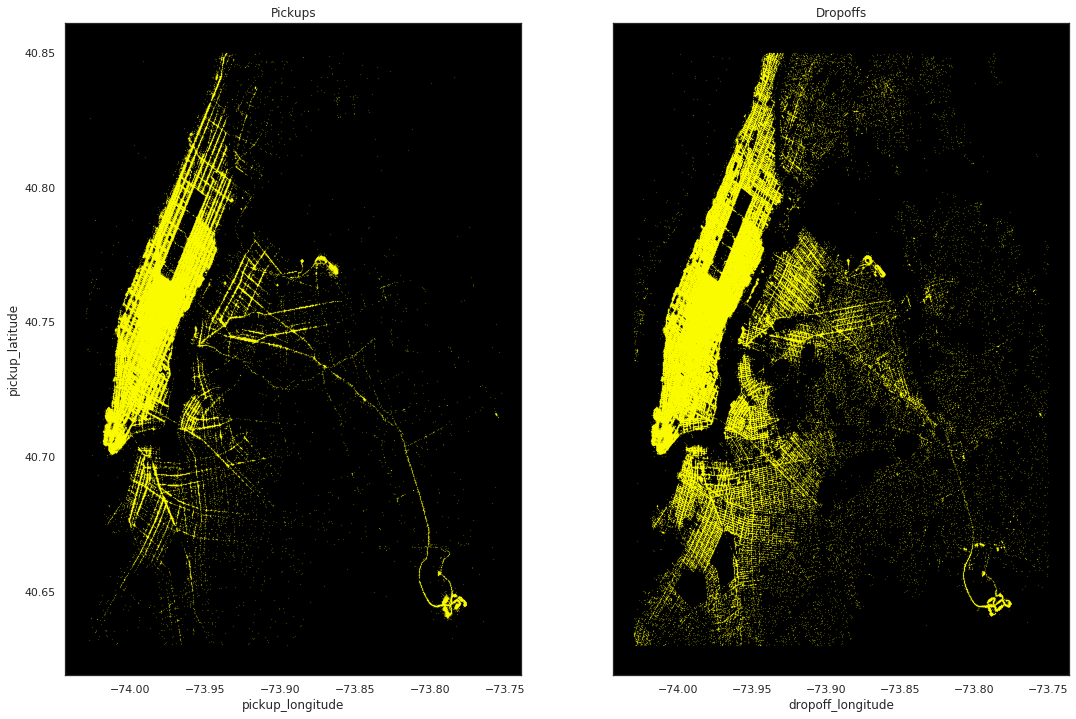

In [39]:
#Now using our data lets create a heat map
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18,12))

train_dfc.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train_dfc.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

In [0]:
#Create the neighborhoods
coords = np.vstack((train_dfc[['pickup_latitude', 'pickup_longitude']].values,
                    train_dfc[['dropoff_latitude', 'dropoff_longitude']].values))

In [0]:
#Lets continue creating the neghborhood clusters
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [0]:
#Here we will create clusters based on dropoff lattiude and dropoff longitude 
train_dfc.loc[:, 'pickup_cluster'] = kmeans.predict(train_dfc[['pickup_latitude', 'pickup_longitude']])
train_dfc.loc[:, 'dropoff_cluster'] = kmeans.predict(train_dfc[['dropoff_latitude', 'dropoff_longitude']])
test_df.loc[:, 'pickup_cluster'] = kmeans.predict(test_df[['pickup_latitude', 'pickup_longitude']])
test_df.loc[:, 'dropoff_cluster'] = kmeans.predict(test_df[['dropoff_latitude', 'dropoff_longitude']])

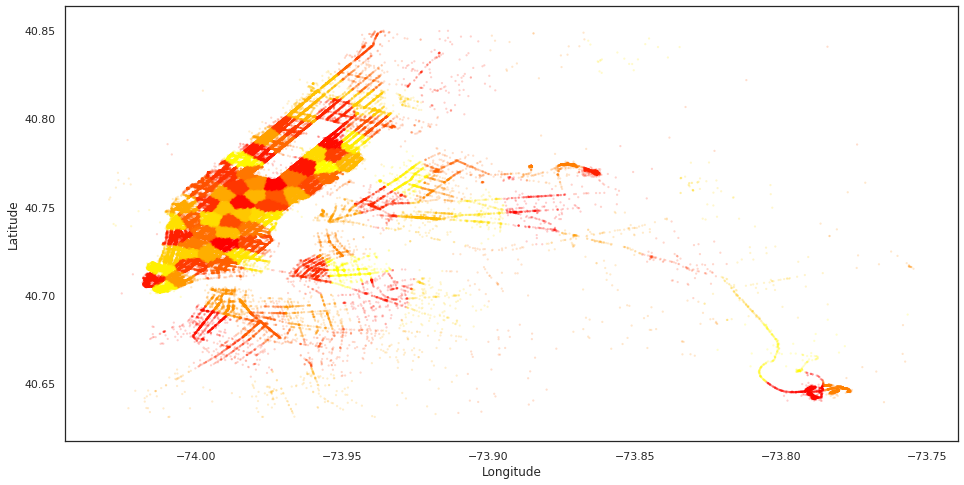

<Figure size 1200x480 with 0 Axes>

In [43]:
#lets show the neighborhoods on the map
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))
plt.figure(figsize=(15, 6), dpi=80)
ax.scatter(train_dfc.pickup_longitude.values[:500000], train_dfc.pickup_latitude.values[:500000], s=5, lw=0,
           c=train_dfc.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

#Graph the pickup location clusters on the map drawn on the New York border coordinates. This shows a visual representation of the KMeans clustering algorithm. The clustering effectively created the different neighbourhoods in Manhattan as displayed by the borders between the different colors. This should be intuitive to some degree as a trip would differ from point A to point B, in various parts of New York. 



---

#**Pickup and Dropoff Date and Time (pickup_datetime & dropoff_datetime ) of the day and Day of the week Histograms**
###We noticed that the pickup_datetime is denoted as an Object . Therefore we will change it to readable time.




In [44]:
#Lets check the data types 
train_dfc.dtypes

id                            object
vendor_id                      int64
pickup_datetime               object
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dropoff_month                  int64
pickup_cluster                 int32
dropoff_cluster                int32
dtype: object

In [0]:
#For this we will first create a copy of the data sets in order to have a barchart which reflects the data more correctly
train_dfdt = train_dfc.copy()

In [0]:
#this code will change the data type on Pickup and dropoff datetime to Date time as opposed to object. We will use this to create some charts
train_dfdt["pickup_datetime"]=train_dfdt["pickup_datetime"].astype("datetime64[s]")
train_dfdt["dropoff_datetime"]=train_dfdt["dropoff_datetime"].astype("datetime64[s]")

In [48]:
train_dfdt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429113 entries, 0 to 1458643
Data columns (total 14 columns):
id                    1429113 non-null object
vendor_id             1429113 non-null int64
pickup_datetime       1429113 non-null datetime64[ns]
dropoff_datetime      1429113 non-null datetime64[ns]
passenger_count       1429113 non-null int64
pickup_longitude      1429113 non-null float64
pickup_latitude       1429113 non-null float64
dropoff_longitude     1429113 non-null float64
dropoff_latitude      1429113 non-null float64
store_and_fwd_flag    1429113 non-null object
trip_duration         1429113 non-null int64
dropoff_month         1429113 non-null int64
pickup_cluster        1429113 non-null int32
dropoff_cluster       1429113 non-null int32
dtypes: datetime64[ns](2), float64(4), int32(2), int64(4), object(2)
memory usage: 152.6+ MB


In [49]:
train_dfdt.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_month,pickup_cluster,dropoff_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,3,46,44
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,6,47,48
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,1,56,59
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,4,80,95
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,3,63,41


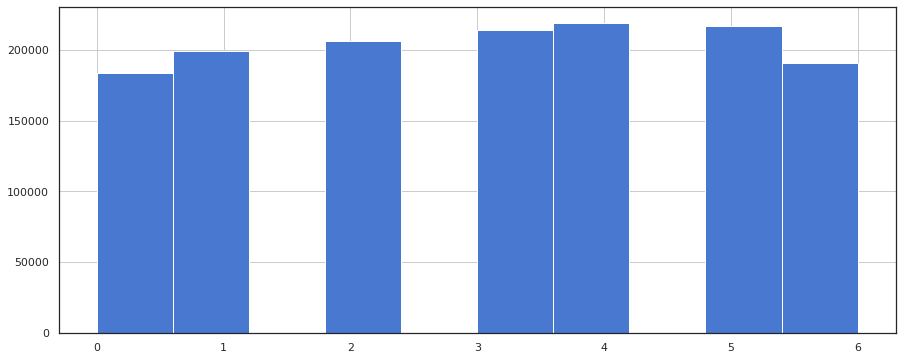

In [50]:
#Visit frequency by day of the week
train_dfdt.pickup_datetime.dt.dayofweek.hist(figsize=(15,6))

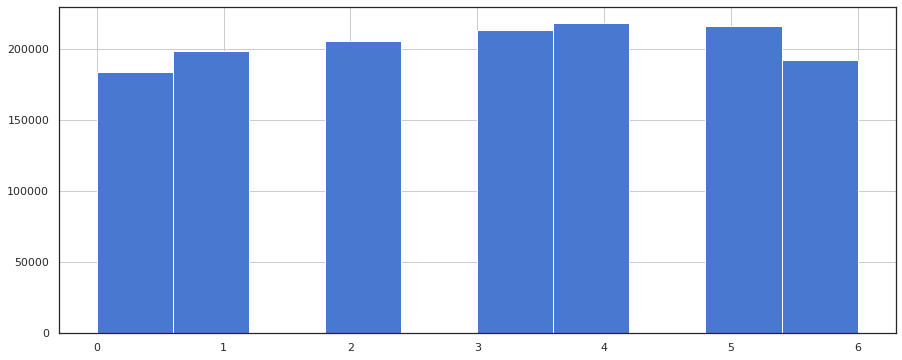

In [51]:
#Visit frequency by day of the week
train_dfdt.dropoff_datetime.dt.dayofweek.hist(figsize=(15,6))

###Above we can see that everyday (0 is Sunday and 6 is Saturday) is pretty much the same number of rides in NYC. The only slow down is around the weekend. 

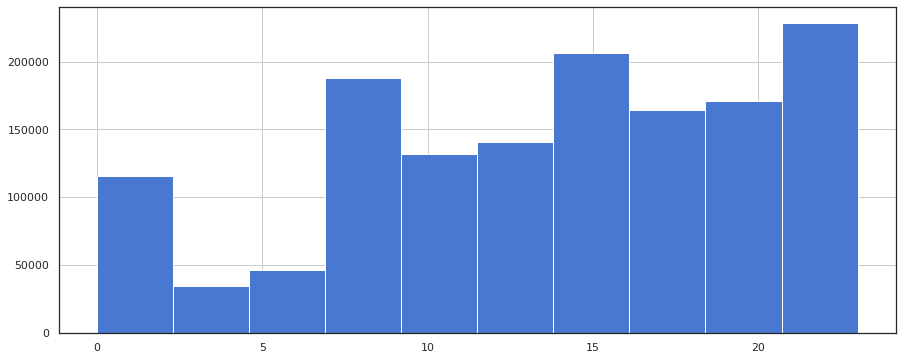

In [52]:
#Visit frequency which ended in a purchase by day of the week
train_dfdt.pickup_datetime.dt.hour.hist(figsize=(15,6))

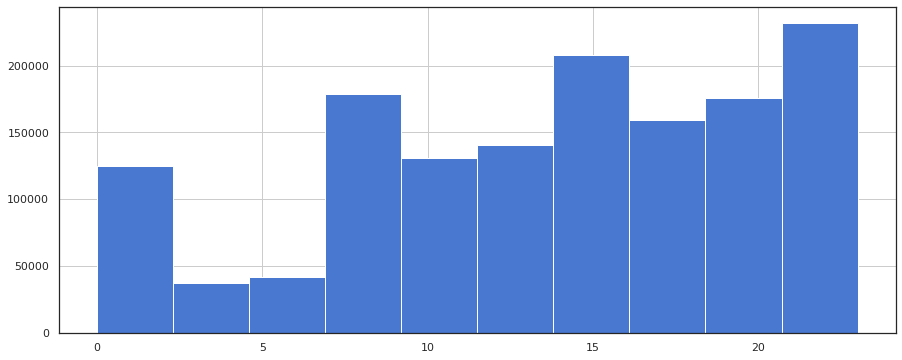

In [53]:
#Visit frequency which ended in a purchase by day of the week
train_dfdt.dropoff_datetime.dt.hour.hist(figsize=(15,6))

#this will be covered a little later

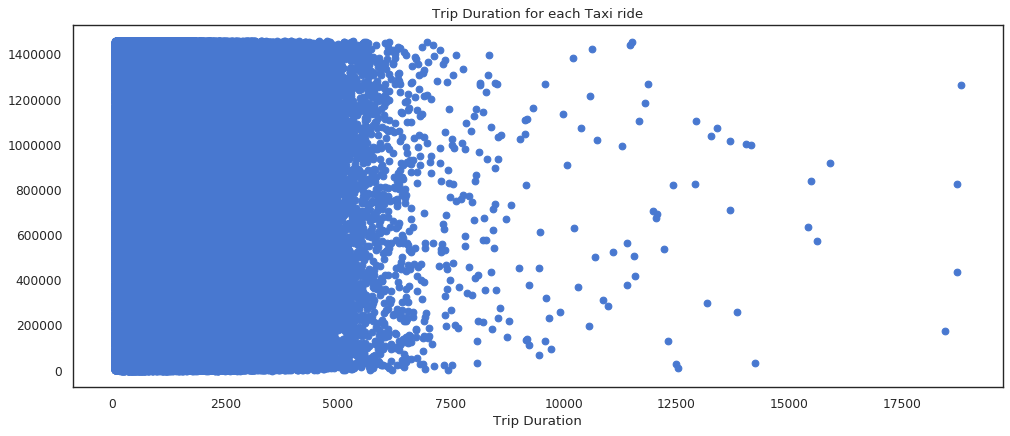

In [54]:
#Lets create a scatterplot which shows how long most rides are
x = train_dfc.trip_duration
y = train_dfc.index
plt.figure(figsize=(15, 6), dpi=80)
plt.xlabel("Trip Duration")
plt.title("Trip Duration for each Taxi ride");
plt.scatter(x, y)

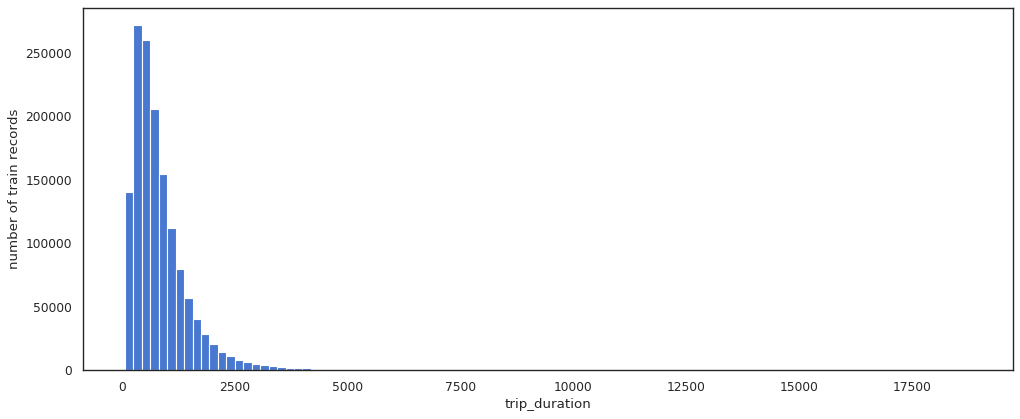

In [55]:
# Lets do the same but with a barchart
plt.figure(figsize=(15, 6), dpi=80)
plt.hist(train_dfc['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

##Let's plot a simple histogram of the trip duration, throwing the data into 100 bins. Binning involves taking your data's max and min points, subtracting it to get the length, dividing that length by the number of bins to get the interval length, and grouping the data points into those intervals. Here's what that looks above. 


Breakdown by Passenger Count
2    206042
5     76632
3     58779
6     47477
4     27847
0        14
Name: passenger_count, dtype: int64


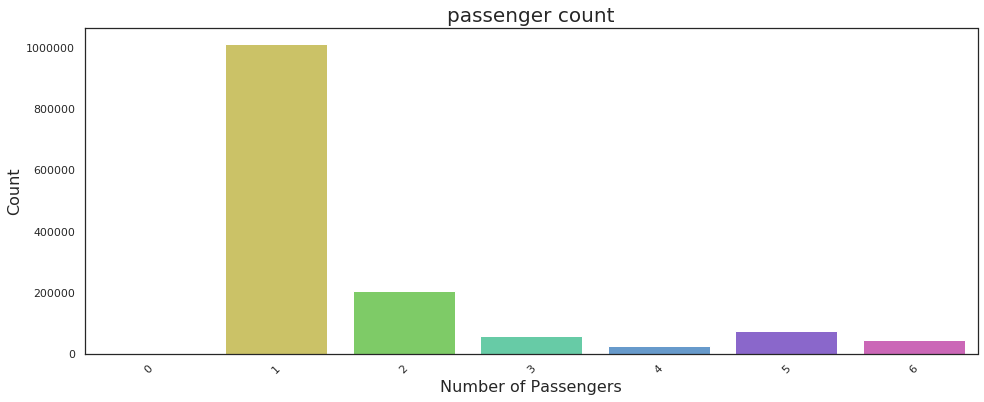

In [56]:
# Visualizing Passenger Count
print("Breakdown by Passenger Count")
print(train_dfc['passenger_count'].value_counts()[1:7] )

# seting the graph size
plt.figure(figsize=(16,6))

# Let explore the browser used by users
seabornInstance.countplot(train_dfc[train_dfc['passenger_count']\
                       .isin(train_dfc['passenger_count']\
                             .value_counts()[:10].index.values)]['passenger_count'], palette="hls") 
plt.title("passenger count", fontsize=20) 
plt.xlabel("Number of Passengers", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=45) 

plt.show() 

Breakdown by dropoff month
3    251015
4    246387
5    243281
2    233770
6    229359
1    225190
7       111
Name: dropoff_month, dtype: int64


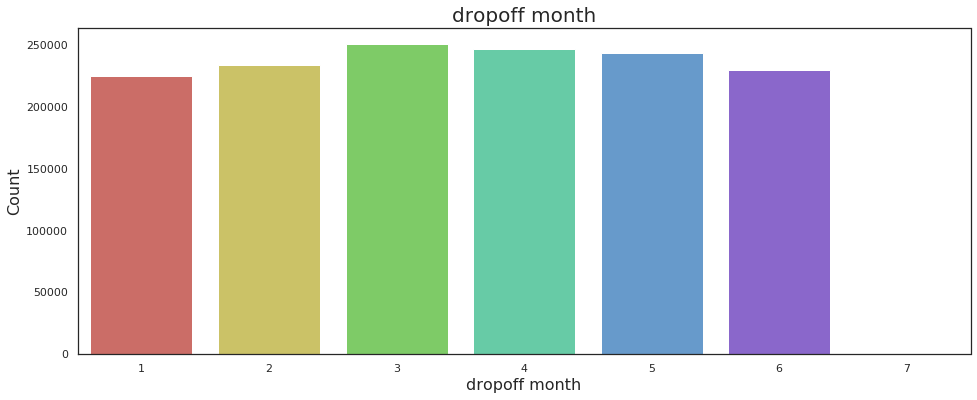

In [57]:
# count of riders by month
print("Breakdown by dropoff month")
print(train_dfc['dropoff_month'].value_counts()[0:12] )

# setting the graph size
plt.figure(figsize=(16,6))

# Let explore the dropoff month
seabornInstance.countplot(train_dfc[train_dfc['dropoff_month']\
                       .isin(train_dfc['dropoff_month']\
                             .value_counts()[:20].index.values)]['dropoff_month'], palette="hls") 
plt.title("dropoff month", fontsize=20) 
plt.xlabel("dropoff month", fontsize=16) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(rotation=0) 

plt.show() 

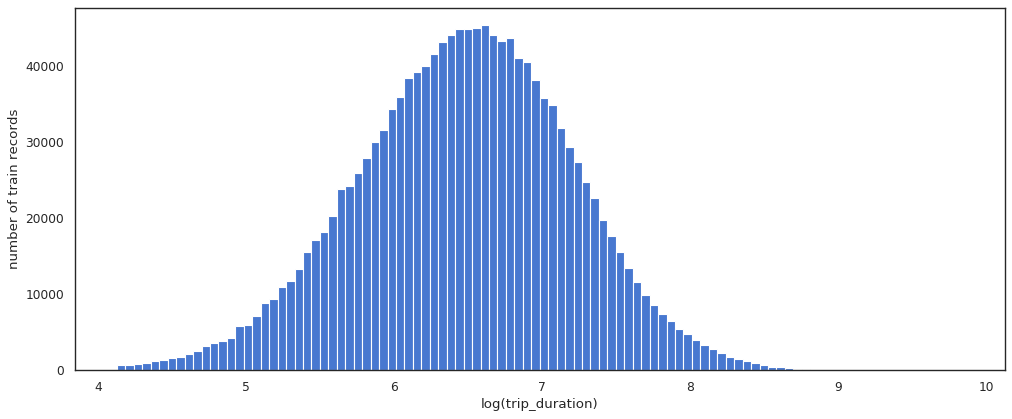

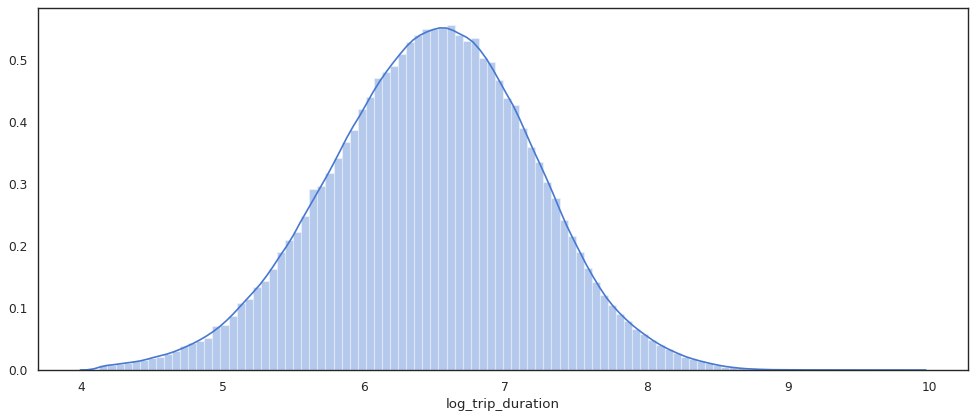

In [58]:
#Lets graph the Lof of the trup duration
train_dfc['log_trip_duration'] = np.log1p(train_dfc['trip_duration'].values + 1)
plt.figure(figsize=(15, 6), dpi=80)
plt.hist(train_dfc['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()
plt.figure(figsize=(15, 6), dpi=80)
sns.distplot(train_dfc["log_trip_duration"], bins =100)


##This is a good opportunity to play with some data transformations to see if notable patterns emerge in the data when applying certain transforms, for example a log transform. In this case, applying a log transformation to the trip duration.

In [59]:
print("Skewness: %f" % train_dfc['log_trip_duration'].skew())
print("Kurtosis: %f" % train_dfc['log_trip_duration'].kurt())

Skewness: -0.129094
Kurtosis: -0.050470


In [0]:
#Feature Engineering
train_dfc['pickup_datetime'] = pd.to_datetime(train_dfc.pickup_datetime)
test_df['pickup_datetime'] = pd.to_datetime(test_df.pickup_datetime)
train_dfc['dropoff_datetime'] = pd.to_datetime(train_dfc.dropoff_datetime)


for df in (train_dfc,test_df):
    # Dates
    df['pickup_date'] = df['pickup_datetime'].dt.date

    # day of month 1 to 30/31
    df['pickup_day'] = df['pickup_datetime'].dt.day

    #month of year 1 to 12
    df['pickup_month'] = df['pickup_datetime'].dt.month

    #weekday 0 to 6
    df['pickup_weekday'] = df['pickup_datetime'].dt.weekday


    #week of year
    df['pickup_weekofyear'] = df['pickup_datetime'].dt.weekofyear

    #hour of day 0 to 23
    df['pickup_hour'] = df['pickup_datetime'].dt.hour

    #minute of hour
    df['pickup_minute'] = df['pickup_datetime'].dt.minute

    # day of year
    df['pickup_dayofyear'] = df['pickup_datetime'].dt.dayofyear

train_dfc['pickup_dt'] = (train_dfc['pickup_datetime'] - train_dfc['pickup_datetime'].min()).dt.total_seconds()
train_dfc['pickup_week_hour'] = train_dfc['pickup_weekday'] * 24 + train_dfc['pickup_hour']


test_df['pickup_dt'] = (test_df['pickup_datetime'] - train_dfc['pickup_datetime'].min()).dt.total_seconds()
test_df['pickup_week_hour'] = test_df['pickup_weekday'] * 24 + test_df['pickup_hour']

In [61]:
train_dfc.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dropoff_month                  int64
pickup_cluster                 int32
dropoff_cluster                int32
log_trip_duration            float64
pickup_date                   object
pickup_day                     int64
pickup_month                   int64
pickup_weekday                 int64
pickup_weekofyear              int64
pickup_hour                    int64
pickup_minute                  int64
pickup_dayofyear               int64
pickup_dt                    float64
pickup_week_hour               int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


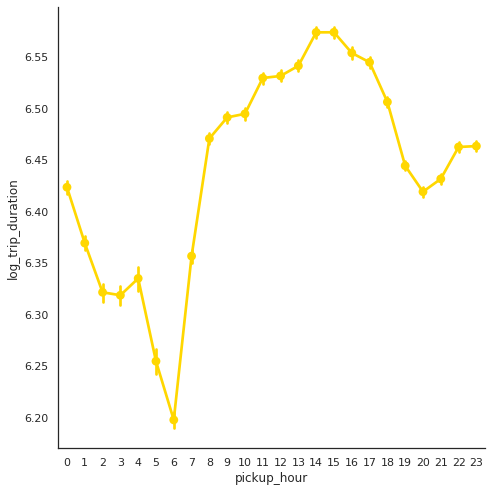

In [62]:
#Going back to what was shown in a bar chart above
#Lets draw a line graph showing the log of trip durations per hour of the day
sns.factorplot(x="pickup_hour", y="log_trip_duration", data=train_dfc,color='gold',size=7);

##Traffic starts increasing around 8am when people starting heading to offices and reaches it's peak around 3pm. This is Rush hour in NYC

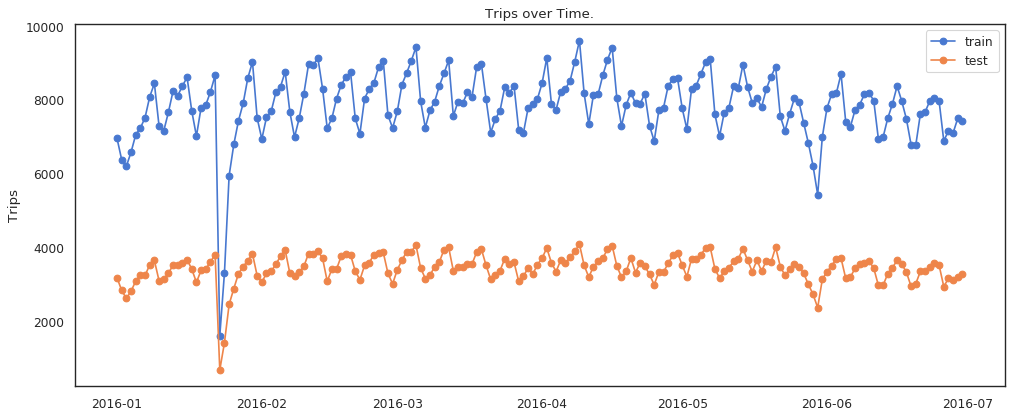

In [63]:
#Lets plot how consistent the training and test data sets are with each other
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(train_dfc.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test_df.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()


##Here we see the test and training data are consistent. A couple of points stand out at first glance. Around late-Jan/early-Feb there is a massive drop in the number of trips taken. A slightly less drastic drop is apparent about four months later. The first drop could be related to the season: it's winter in New York so you'd expect less trips being taken. However, this seems unlikely because the dip looks to be isolated around a single day or couple of days. In my opinion, there was an issue with the data system recording the trips, whatever the reason, it's worth noting these 'outliers'.

#**Training the Model**



In [0]:
#First lets create a copy of the dataframe
train_dfcp = train_dfc.copy()

In [65]:
train_dfcp.shape

(1429113, 25)

In [66]:
#now lets look at the data types in this data set
train_dfcp.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dropoff_month                  int64
pickup_cluster                 int32
dropoff_cluster                int32
log_trip_duration            float64
pickup_date                   object
pickup_day                     int64
pickup_month                   int64
pickup_weekday                 int64
pickup_weekofyear              int64
pickup_hour                    int64
pickup_minute                  int64
pickup_dayofyear               int64
pickup_dt                    float64
pickup_week_hour               int64
dtype: object

In [67]:
#first lets set our training section of the model
target=train_dfcp.log_trip_duration.values
train_dfcp = train_dfcp.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag','trip_duration', 'dropoff_month', 'pickup_cluster', 'dropoff_cluster' , 'pickup_date'], axis=1)
train_dfcp.fillna(0,inplace=True)
#now lets take a look at the data types
train_dfcp.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
log_trip_duration    float64
pickup_day             int64
pickup_month           int64
pickup_weekday         int64
pickup_weekofyear      int64
pickup_hour            int64
pickup_minute          int64
pickup_dayofyear       int64
pickup_dt            float64
pickup_week_hour       int64
dtype: object

In [0]:
#Now lets set our test part
Id=test_df.id.values
test = test_df.drop(['id', 'pickup_datetime', 'store_and_fwd_flag', 'pickup_cluster', 'dropoff_cluster', 'pickup_date'], axis=1)
test_df.fillna(0,inplace=True)
predictors=test_df.columns

In [69]:
#lets take a look at the data type to unify train and test
test.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
pickup_day             int64
pickup_month           int64
pickup_weekday         int64
pickup_weekofyear      int64
pickup_hour            int64
pickup_minute          int64
pickup_dayofyear       int64
pickup_dt            float64
pickup_week_hour       int64
dtype: object

In [0]:
#Due to Notebook Technical Limitations, we will create a subset
train_dfcp_sub = train_dfcp.sample(frac = 0.01)
test_dfcp_sub = test.sample(frac = 0.01)

In [71]:
train_dfcp_sub.shape

(14291, 16)

In [72]:
train_dfcp_sub.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
log_trip_duration    float64
pickup_day             int64
pickup_month           int64
pickup_weekday         int64
pickup_weekofyear      int64
pickup_hour            int64
pickup_minute          int64
pickup_dayofyear       int64
pickup_dt            float64
pickup_week_hour       int64
dtype: object

In [73]:
test_dfcp_sub.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
pickup_day             int64
pickup_month           int64
pickup_weekday         int64
pickup_weekofyear      int64
pickup_hour            int64
pickup_minute          int64
pickup_dayofyear       int64
pickup_dt            float64
pickup_week_hour       int64
dtype: object

In [0]:
#since we are using log trip duration which is in the training data set and not the test
#lets add the feature to the test set
test_dfcp_sub.insert(6, "log_trip_duration", True)
test_dfcp_sub.fillna(6,inplace=True)

In [75]:
#lets make sure it was added correctly 
test_dfcp_sub.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
log_trip_duration       bool
pickup_day             int64
pickup_month           int64
pickup_weekday         int64
pickup_weekofyear      int64
pickup_hour            int64
pickup_minute          int64
pickup_dayofyear       int64
pickup_dt            float64
pickup_week_hour       int64
dtype: object

In [0]:
#we have to set the target to the new set 
target=train_dfcp_sub.log_trip_duration.values

In [0]:
#since its easy to cluster rides based on area and time  we will use random forests
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=1000, min_samples_leaf=50, min_samples_split=75)

In [0]:
#lets train the model
rf_model.fit(train_dfcp_sub.values, target)
predictions=rf_model.predict(test_dfcp_sub.values)

In [79]:
#lets see our predictions 
predictions[:10]

array([4.40085287, 4.40085287, 4.40080662, 4.40068998, 4.40085287,
       4.40085287, 4.40083809, 4.40076344, 4.40083809, 4.40077893])

In [80]:
#submission
test_dfcp_sub['trip_duration'] = np.exp(predictions) -1
test_df['id']=Id
test_dfcp_sub['trip_duration'][:5]

598518   80.520
480686   80.520
15441    80.517
228090   80.507
618001   80.520
Name: trip_duration, dtype: float64

--- 
#Conclusion: We see which features have the greatest affect on trip duration. It would make logical sense that distance, travel time, pick-up  have the greatest affect. In additon, we notice the majority of pick-ups occurring in Upper East Side heading to work in Midtown. Also, the travel time will increase if the starting destination happens from JFK airport to Manhattan.

---
# References:
https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/

https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
